# 1 Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 2 Read Data 

In [2]:
df = pd.read_csv(r"C:\Users\DELL-PC\Downloads\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3 EDA (Exploratory data analysis ) 

### 3.1 Understand the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.2 Missing values

In [5]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Above the result we can see that In Cabin variable 77 % data  are missing and age variable has 20% missing data 

In [6]:
df = df.drop(["Cabin","Name","PassengerId","Ticket"],axis=1)

In [7]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

### 3.4 Descriptive Statistics 

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include='O')

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


### 3.5 Visualization of diffrent variable 

#### 3.5.1 Univariate analysis 

1 distribution of Age variable 

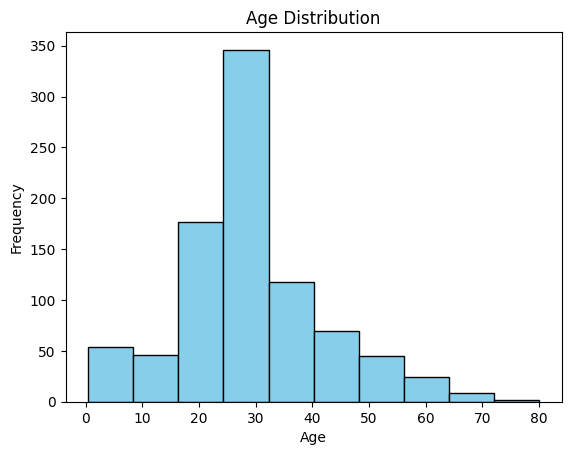

In [11]:
plt.hist(df.Age, bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2 Distribution of Fare 

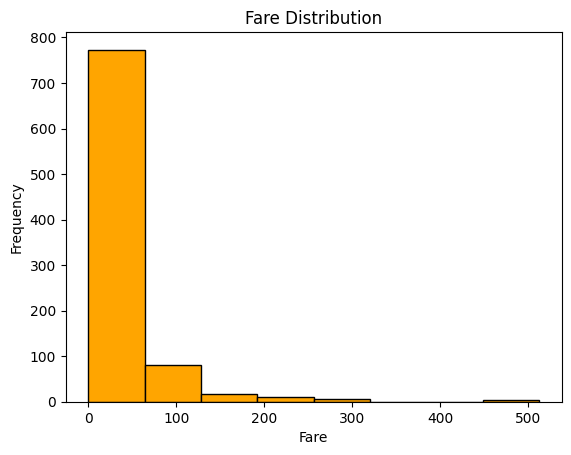

In [12]:
plt.hist(df.Fare, bins=8, color='Orange', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

 3 Distribution of "sex" variable 

<Axes: xlabel='Sex'>

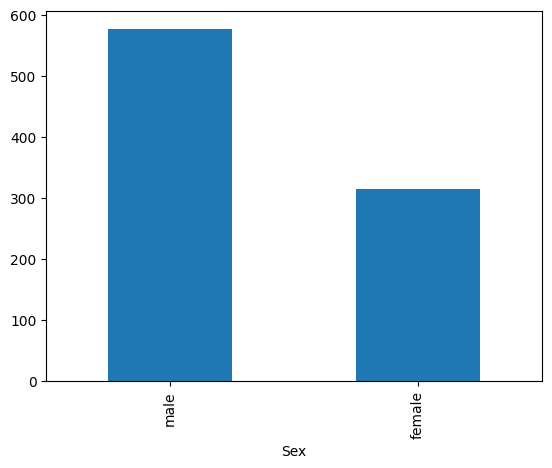

In [13]:
df["Sex"].value_counts().plot(kind="bar")

4 distribution of "Embarked" Variable 

<Axes: xlabel='Embarked'>

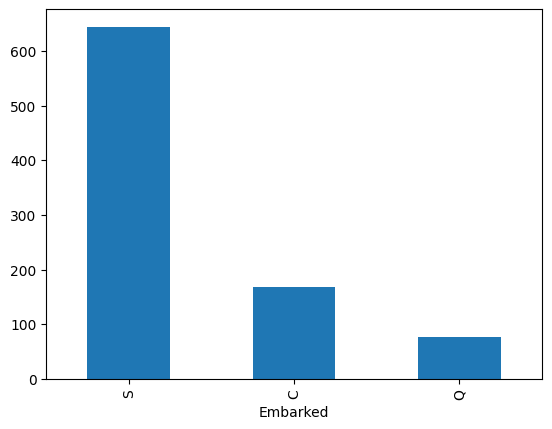

In [14]:
df["Embarked"].value_counts().plot(kind="bar")

5 Distributon of "Pclass" Variable 

<Axes: xlabel='Pclass'>

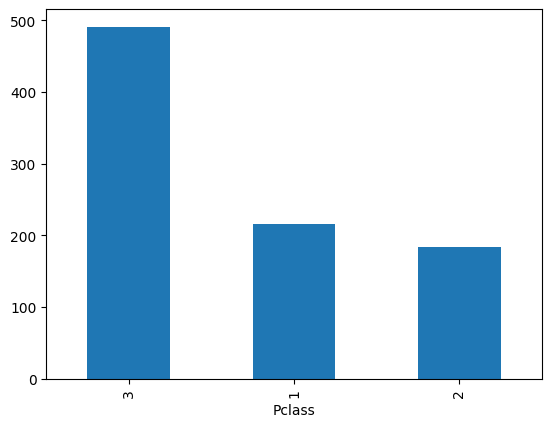

In [15]:
df["Pclass"].value_counts().plot(kind="bar")

6 Distribution of Survived variable 

Survived
0    549
1    342
Name: count, dtype: int64

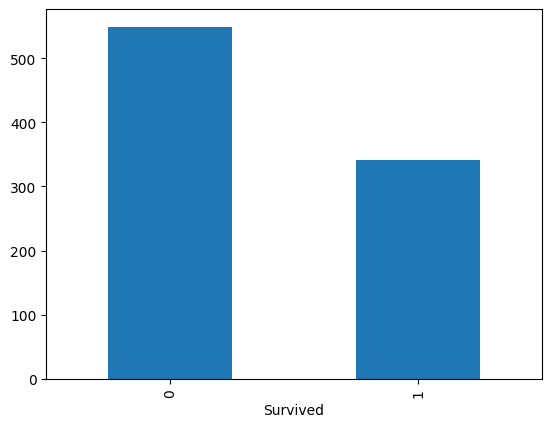

In [16]:
df["Survived"].value_counts().plot(kind="bar")
df["Survived"].value_counts()

#### 3.5.2 Bivariate analysis 

<Axes: xlabel='Survived', ylabel='count'>

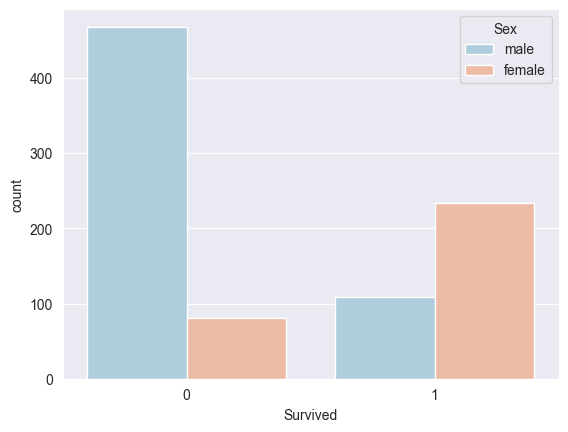

In [17]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

# 4 Data preprocessing 

<Axes: ylabel='Age'>

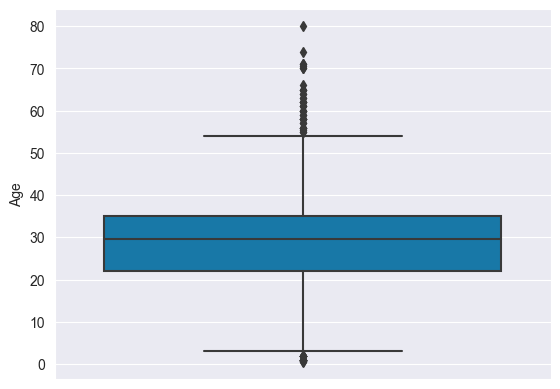

In [18]:
sns.boxplot(y='Age',data=df,palette='winter')

<Axes: ylabel='Fare'>

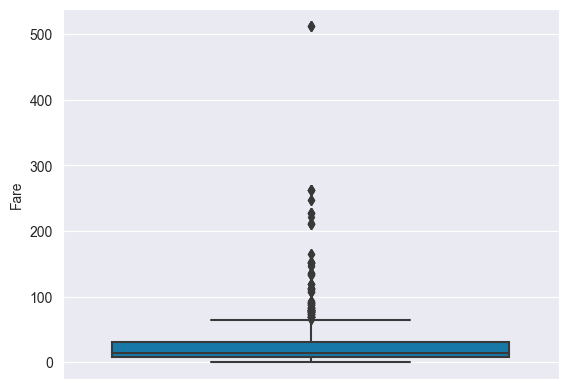

In [19]:
sns.boxplot(y='Fare',data=df,palette='winter')

In [20]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR))]

In [21]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR))]

## Encoding 

In [22]:
df1 = pd.get_dummies(df,drop_first=True,dtype=int)

In [23]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,29.699118,0,0,8.4583,1,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [24]:
X = df1.drop('Survived',axis=1)
Y = df1["Survived"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X, Y, train_size = 0.70 , random_state=42)

In [26]:
x_train.shape,x_test.shape

((495, 8), (213, 8))

In [27]:
y_train.value_counts()

Survived
0    340
1    155
Name: count, dtype: int64

In [28]:
from imblearn.combine import SMOTETomek
sampling = SMOTETomek()

In [29]:
X_train_os, Y_train_os = sampling.fit_resample(x_train, y_train)

In [30]:
Y_train_os.value_counts()

Survived
1    312
0    312
Name: count, dtype: int64

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LOR =LogisticRegression()

In [32]:
lor_model = LOR.fit(X_train_os,Y_train_os)

C:\Users\DELL-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
lor_y_predict = lor_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_score,recall_score,roc_auc_score
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_test,lor_y_predict)
accuracy

0.7887323943661971

In [36]:
def CM(Actual,Predicted) :
    cm = sns.heatmap(confusion_matrix(Actual,Predicted),annot = True ,fmt = '.2f',xticklabels=['yes','No'],yticklabels=['yes','No'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return cm  

In [37]:
def ROC_Curve(Actual,Predicted):
    fpr,tpr,thresholds = roc_curve(Actual,Predicted)
    roc = plt.plot(fpr,tpr)
    plt.xlabel('False Possitive Rate')
    plt.ylabel('True Possitive Rate')
    plt.title('ROC CURVE')
    plt.show()
    return roc

<Axes: xlabel='Predicted', ylabel='Actual'>

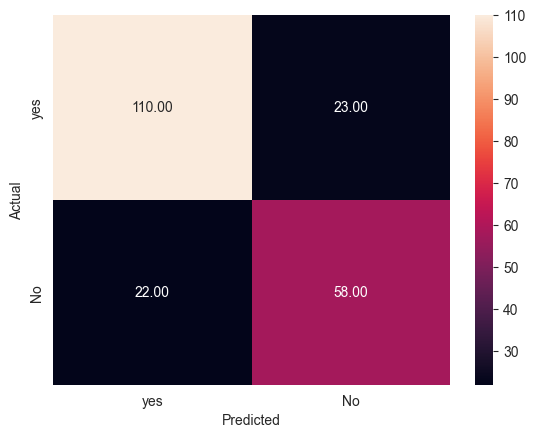

In [38]:
CM(y_test,lor_y_predict)

# Decision Tree 

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini',min_samples_split=10,max_depth=5)

In [41]:
dt_model = DT.fit(X_train_os,Y_train_os)

In [45]:
dt_y_pred = dt_model.predict(x_test)

In [46]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       133
           1       0.80      0.74      0.77        80

    accuracy                           0.83       213
   macro avg       0.82      0.81      0.82       213
weighted avg       0.83      0.83      0.83       213



In [47]:
accuracy = accuracy_score(y_test,dt_y_pred)
accuracy

0.8309859154929577

<Axes: xlabel='Predicted', ylabel='Actual'>

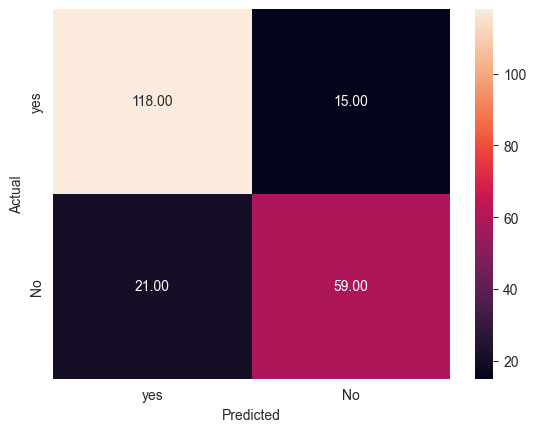

In [63]:
CM(y_test,dt_y_pred)

In [49]:
from sklearn.model_selection import GridSearchCV
dt_param = [{'criterion':['gini','entropy'],'min_samples_split':range(7,20),'max_depth':range(1,5)}]
dt_gs = GridSearchCV(DecisionTreeClassifier(),dt_param,cv=10,scoring='accuracy')
dt_gs.fit(X_train_os,Y_train_os)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 5),
                          'min_samples_split': range(7, 20)}],
             scoring='accuracy')

In [50]:
dt_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 8}

In [51]:
dt_gs.best_score_

0.841705069124424

# Random forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 200 , criterion = 'gini' , max_depth = 4 , min_samples_split = 13) 

RF_model = RF.fit(X_train_os,Y_train_os)

In [56]:
RF_y_pred = RF_model.predict(x_test)

In [57]:
print(classification_report(y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       133
           1       0.79      0.70      0.74        80

    accuracy                           0.82       213
   macro avg       0.81      0.79      0.80       213
weighted avg       0.82      0.82      0.81       213



In [58]:
accuracy = accuracy_score(y_test,RF_y_pred)

accuracy

0.8169014084507042

<Axes: xlabel='Predicted', ylabel='Actual'>

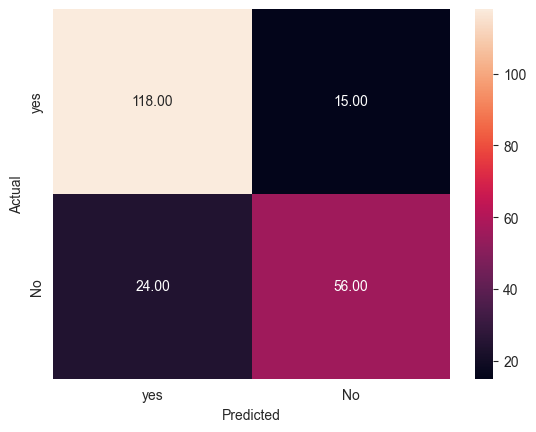

In [64]:
CM(y_test,RF_y_pred)

In [60]:
rf_tun = [{'min_samples_split':range(5,20),'n_estimators':range(1,10),'max_depth':[5,10,15]}]
gs_rf = GridSearchCV(RandomForestClassifier(),rf_tun,cv = 10,scoring = 'accuracy')
gs_rf.fit(X_train_os,Y_train_os)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': range(5, 20),
                          'n_estimators': range(1, 10)}],
             scoring='accuracy')

In [61]:
gs_rf.best_params_

{'max_depth': 15, 'min_samples_split': 7, 'n_estimators': 8}

In [62]:
gs_rf.best_score_

0.8753712237583204